In [10]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import numpy as np

iris = datasets.load_iris()

X=iris.data[:,[2,3]]
y=iris.target

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [11]:
# 2次元座標の準備

# データの最小値、最大値を計算
Xmin,Xmax=X[:,0].min()-1,X[:,0].max()+1
ymin,ymax=X[:,1].min()-1,X[:,1].max()+1

# meshgridメソッドで2つの配列を作る
xaxis,yaxis=np.meshgrid(np.arange(Xmin,Xmax,0.02),
                       np.arange(ymin,ymax,0.02))

print(xaxis.shape)
print(yaxis.shape)

# xaxisとyaxisの要素を1行にまとめるために組合せの数を計算
data_num=xaxis.shape[0]*xaxis.shape[1]
print(data_num)

# 2つの1次元配列を組合せて2次元配列を作成
grid_points=np.concatenate((xaxis.reshape(data_num,1),yaxis.reshape(data_num,1)),axis=1)
print(grid_points.shape)

(220, 395)
(220, 395)
86900
(86900, 2)


In [12]:
# ここから決定木分類の内容
from sklearn.tree import DecisionTreeClassifier

# 過学習を避けるため深さは浅めの3に設定
tree = DecisionTreeClassifier(max_depth=3,random_state=0)

tree.fit(Xtrain,ytrain)

pred_label=tree.predict(grid_points)
pred_label=pred_label.reshape(xaxis.shape)
print(pred_label.shape)

(220, 395)


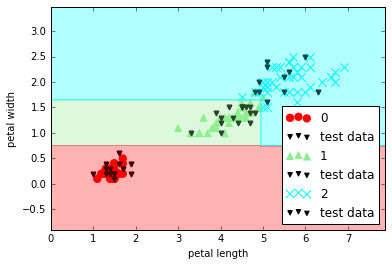

In [13]:
# 予測した結果のグラフ化
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# マーカーの準備
markers=('o','^','x')

# 色を用意
colors=('red','lightgreen','cyan')

#  指定した数の色を使ったmapを作図
cmap=ListedColormap(colors)

for i,n in enumerate(np.unique(y)):
    plt.scatter(x=Xtrain[ytrain==n,0],
               y=Xtrain[ytrain==n,1],
               c=cmap(i),
               marker=markers[i],
               s=70,
               edgecolors='',
               label=n)
    
    plt.scatter(Xtest[:,0],
               Xtest[:,1],
                c='k',
               marker='v',
               label='test data')
    
plt.xlim(xaxis.min(),xaxis.max())
plt.ylim(yaxis.min(),yaxis.max())

plt.contourf(xaxis,yaxis,pred_label,alpha=0.3,cmap=cmap)

plt.legend(loc='lower right')

plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()

(220, 395)


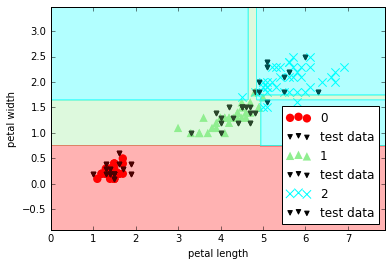

In [17]:
# 決定木の深さを変更するとどう変化するのか
tree = DecisionTreeClassifier(max_depth=6,random_state=0)

tree.fit(Xtrain,ytrain)

pred_label=tree.predict(grid_points)
pred_label=pred_label.reshape(xaxis.shape)
print(pred_label.shape)

# 予測した結果のグラフ化
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# マーカーの準備
markers=('o','^','x')

# 色を用意
colors=('red','lightgreen','cyan')

#  指定した数の色を使ったmapを作図
cmap=ListedColormap(colors)

for i,n in enumerate(np.unique(y)):
    plt.scatter(x=Xtrain[ytrain==n,0],
               y=Xtrain[ytrain==n,1],
               c=cmap(i),
               marker=markers[i],
               s=70,
               edgecolors='',
               label=n)
    
    plt.scatter(Xtest[:,0],
               Xtest[:,1],
                c='k',
               marker='v',
               label='test data')
    
plt.xlim(xaxis.min(),xaxis.max())
plt.ylim(yaxis.min(),yaxis.max())

plt.contourf(xaxis,yaxis,pred_label,alpha=0.3,cmap=cmap)

plt.legend(loc='lower right')

plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()

In [26]:
# さっきよりも形がいびつになって過学習が起きている？
# 決定木の分類過程には有益な情報が詰まっているため、確認をしてみる
# graphvizがimportできず確認できなかった、、、、